# MPI Analysis
- Works on all cpu_mpi caliper files.
- Provides Strong, Weak, and Speedup scaling plots.
- Provides SUMMA scaling plots of all MPI caliper files.

In [354]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [355]:
# # jupyter
# tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

# local
parallel = 'cpu_mpi'
algo = 'SUMMA'

# GLOBAL VARS
process_cols = (1, 2, 4, 8, 16, 32, 64, 128) if algo == 'naive' else (1, 4, 16, 64) 

tk = th.Thicket.from_caliperreader(glob(f"../caliper/{parallel}/{algo}/*.cali", recursive=True))

# Performance data
tk.dataframe.head(20)
# tk.metadata

nid   spot.channel  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 20854488      1  regionprofile   
                                     339645345     1  regionprofile   
                                     419061117     1  regionprofile   
                                     453400704     1  regionprofile   
                                     508240042     1  regionprofile   
                                     537375756     1  regionprofile   
                                     611324379     1  regionprofile   
                                     948409765     1  regionprofile   
                                     1246541392    1  regionprofile   
                                     1579195926    1  regionprofile   
                                     1769155551    1  regionprofile   
                                     1993551877    1  regionprofile   
                                     2007500720    1  regionprofile   
                                     2251809804    1  regionprofile   
                                     2296205376    1  regionprofile   
                                     2814021149    1  regionprofile   
                                     2859797629    1  regionprofile   
                                     3174553393    1  regionprofile   
                                     3247406632    1  regionprofile   
                                     3620859203    1  regionprofile   

                                                 Min time/rank  Max time/rank  \
node                                 profile                                    
{'name': 'main', 'type': 'function'} 20854488       504.399255    2404.722068   
                                     339645345        0.445583       0.445583   
                                     419061117        6.117712     236.347663   
                                     453400704       22.502633     135.668750   
                                     508240042        0.395860       0.460502   
                                     537375756        0.269322       0.269322   
                                     611324379        2.127505       3.400455   
                                     948409765        1.239414     256.199231   
                                     1246541392       0.381508       0.481997   
                                     1579195926       0.397919       1.713289   
                                     1769155551       0.414837       0.428916   
                                     1993551877      11.967155    1923.649052   
                                     2007500720       3.207903      13.296805   
                                     2251809804      20.173951      20.173951   
                                     2296205376       0.431259       0.528971   
                                     2814021149       2.876996       2.876996   
                                     2859797629       0.559868      11.621364   
                                     3174553393       0.793667      11.111623   
                                     3247406632       2.290068       3.625544   
                                     3620859203       0.441301       0.469647   

                                                 Avg time/rank   Total time  \
node                                 profile                                  
{'name': 'main', 'type': 'function'} 20854488       979.481487  3917.925947   
                                     339645345        0.445583     0.445583   
                                     419061117       20.590416   329.446655   
                                     453400704       50.794256   203.177025   
                                     508240042        0.437375    27.992025   
                                     537375756        0.269322     0.269322   
                                     611324379        2.218744    35.49

Compose these 3 groups column-wise to get a holistic view of the data

In [356]:
gb = tk.groupby("num_procs")

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk.dataframe.head(20)

4  thickets created...
{1: <thicket.thicket.Thicket object at 0x0000012182694310>, 4: <thicket.thicket.Thicket object at 0x00000121FD5B9590>, 16: <thicket.thicket.Thicket object at 0x00000121FD376850>, 64: <thicket.thicket.Thicket object at 0x00000121FA5C6D50>}


1                 \
                                                     nid   spot.channel   
node                                       InputSize                      
{'name': 'main', 'type': 'function'}       128         1  regionprofile   
                                           256         1  regionprofile   
                                           512         1  regionprofile   
                                           1024        1  regionprofile   
                                           2048        1  regionprofile   
                                           4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}       128         3  regionprofile   
                                           256         3  regionprofile   
                                           512         3  regionprofile   
                                           1024        3  regionprofile   
                                           2048        3  regionprofile   
                                           4096        3  regionprofile   
{'name': 'comm_large', 'type': 'function'} 128         4  regionprofile   
                                           256         4  regionprofile   
                                           512         4  regionprofile   
                                           1024        4  regionprofile   
                                           2048        4  regionprofile   
                                           4096        4  regionprofile   
{'name': 'bcast', 'type': 'function'}      128        11  regionprofile   
                                           256        11  regionprofile   

                                                                    \
                                                     Min time/rank   
node                                       InputSize                 
{'name': 'main', 'type': 'function'}       128            0.269322   
                                           256            0.445583   
                                           512            2.876996   
                                           1024          20.173951   
                                           2048         484.852546   
                                           4096        3808.469623   
{'name': 'comm', 'type': 'function'}       128            0.000747   
                                           256            0.002441   
                                           512            0.008127   
                                           1024           0.028979   
                                           2048           0.123773   
                                           4096           0.494051   
{'name': 'comm_large', 'type': 'function'} 128            0.000561   
                                           256            0.002181   
                                           512            0.007609   
                                           1024           0.027112   
                                           2048           0.116506   
                                           4096           0.465776   
{'name': 'bcast', 'type': 'function'}      128            0.000025   
                                           256            0.000024   

                                                                    \
                                                     Max time/rank   
node                                       InputSize                 
{'name': 'main', 'type': 'function'}       128            0.269322   
                                           256            0.445583   
                                           512            2.876996   
                                           1024          20.173951   
                                           2048         484.852546   
                                           4096        3808.469623   
{'name': 'comm', 'type': 'function'}       128            0.000747   
                  

Perform pandas operations to get the table in a desirable format for plotting

In [357]:
# Drop unwanted columns
def formatt():
    array = [("node","")]
    for i in process_cols:
        # comment out the one you wnat to plot
        array.append((i,"nid"))
        array.append((i,"spot.channel"))
        array.append((i,"Min time/rank"))
        array.append((i,"Max time/rank"))
        # array.append((i,"Avg time/rank"))
        array.append((i,"Total time"))
        array.append((i,"Variance time/rank"))

    ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

    ctk.dataframe.columns

In [358]:
# ctk.dataframe.loc['comp_large']

In [359]:

def analysis():# Plot stuff!
    df = ctk.dataframe
    matrix_sizes = [128, 256, 512, 1024, 2048, 4096]
    caliper_label = 'comp'

    # Strong Scaling: Time vs Procs
    for matrix_size in matrix_sizes:
        data = df.loc[caliper_label, matrix_size]
        data.index = data.index.droplevel(1)
        axis = data.plot(
            title=f"Strong Scaling Matrix",
            label=f"Matrix Size: {matrix_size}",
            xlabel="Number of Processes",
            ylabel="Time (s)",
            marker=".",
        )
        axis.set_xscale("log", base=2)
        axis.set_yscale("log", base=2)
    plt.legend()
    plt.show()


    # Weak Scaling: Time per Proc vs Procs
    from math import log2
    data = df.loc[caliper_label]
    data.columns = data.columns.droplevel(1)
    ratios = {}
    for i in range(data.shape[1]-1, -1, -1):
        ratios[data.index[0]**2 // data.columns[i]] = {}
    for i in range(1, data.shape[0]):
        ratios[data.index[i]**2 // data.columns[0]] = {}

    for i in range(data.shape[0]):
        matrix_size = data.index[i]
        for j in range(data.shape[1]):
            nodes = data.columns[j]
            
            if matrix_size**2 // nodes in ratios:
                ratios[matrix_size**2 // nodes][nodes] = data.iloc[i, j]

    fig, ax = plt.subplots()
    for ratio, diagonal in ratios.items():
        if len(diagonal) < 3:
            continue
        data = pd.Series(diagonal)
        ax.loglog(data, marker=".", label=f"NxN Ratio: 2^{int(log2(ratio))}", base=2)
    ax.set_title("Weak Scaling Matrix")
    ax.set_xlabel("Number of Processes")
    ax.set_ylabel("Time (s)")
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()


    # Speedup: Sequential Time / Parallel Time vs Procs
    for matrix_size in matrix_sizes:
        data = df.loc[caliper_label, matrix_size]
        data.index = data.index.droplevel(1)
        data.name = f"Matrix Size: {matrix_size}"
        axis = (data.iloc[0] / data).plot(
            title=f"Speedup Matrix",
            xlabel="Number of Processes",
            ylabel="Speedup",
            marker=".",
        )
        axis.name = f"Matrix Size: {matrix_size}"
    plt.legend()
    plt.show()
# analysis()

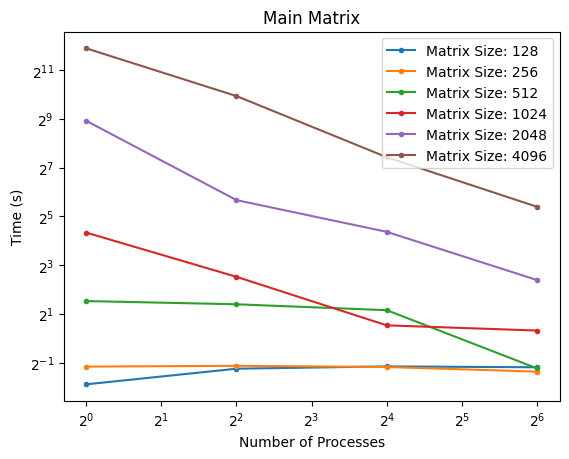

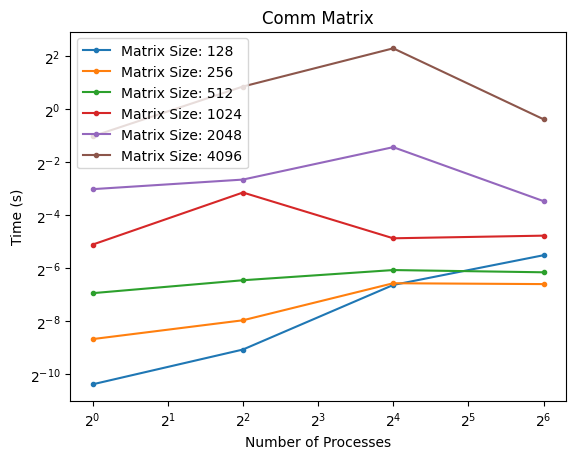

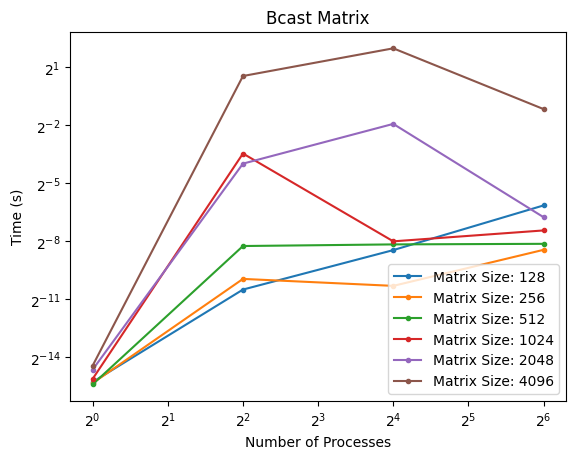

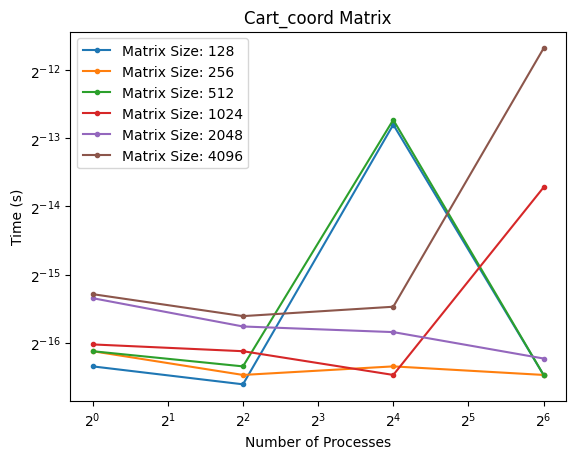

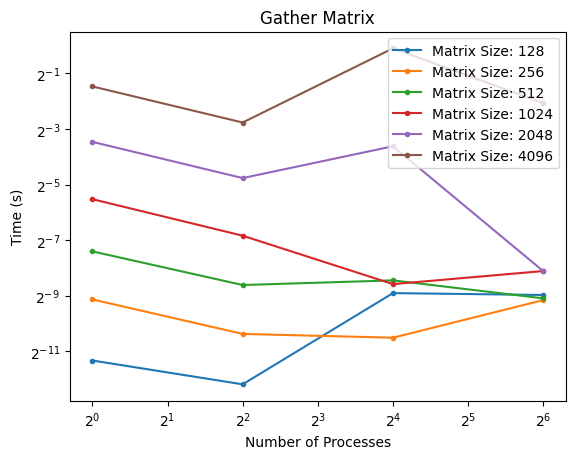

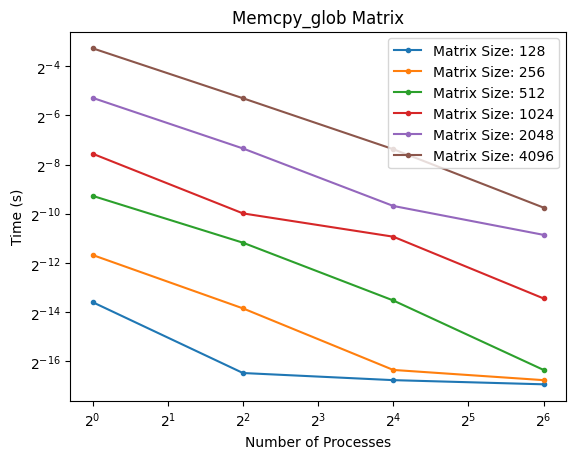

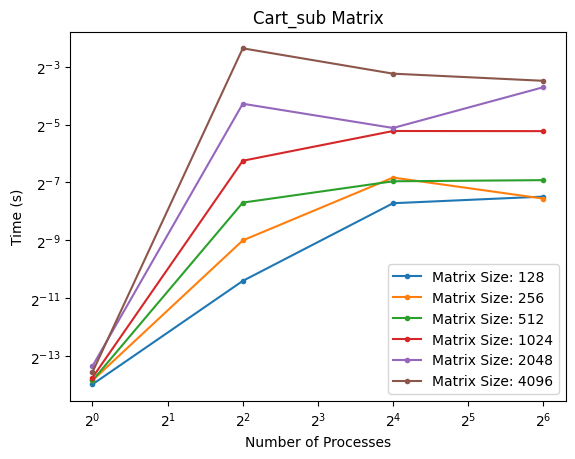

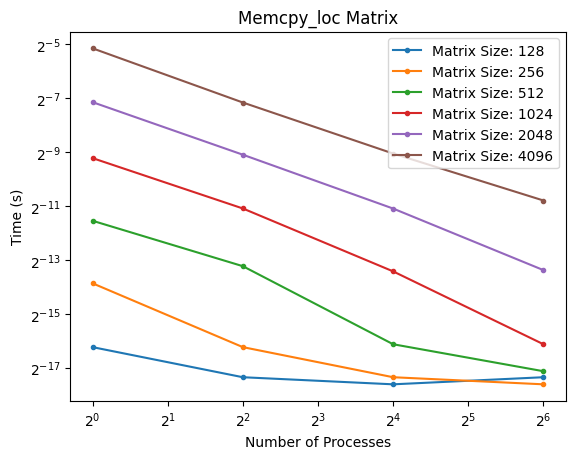

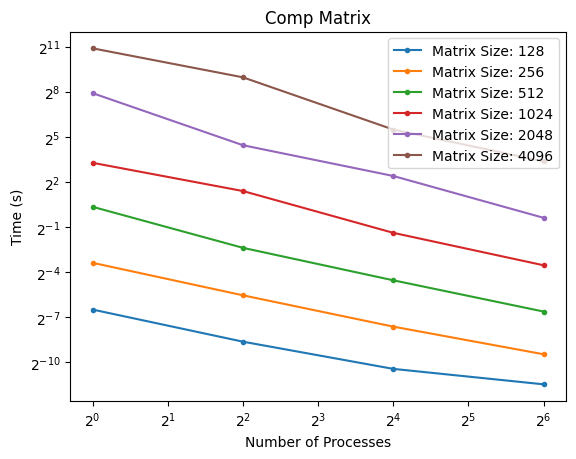

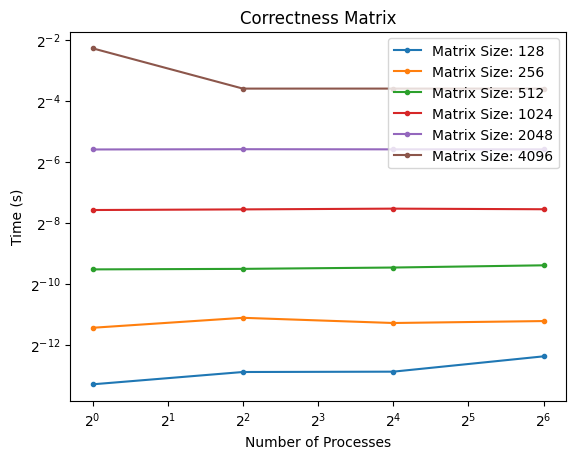

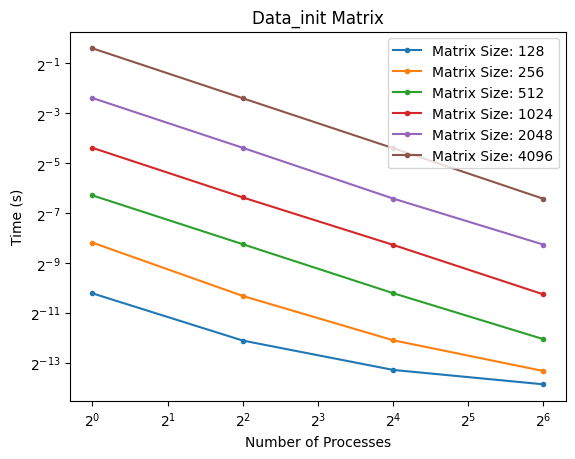

In [370]:
# UNCOMMENT TO SEE STRONG, WEAK, AND SPEEDUP PLOTS
# formatt()
# analysis()

# SUMMA FOR PLOTTING INDIVIDUAL CALIPER REGIONS
df = ctk.dataframe.droplevel(1, axis=1)
caliper_regions = ['main', 'comm', 'bcast', 'cart_coord', 'gather', 'memcpy_glob', 'cart_sub', 'memcpy_loc', 'comp', 'correctness', 'data_init'] # skipping commlarge, commsmall, complarge, compsmall
for caliper_region in caliper_regions:
    df_region = df.loc[caliper_region]
    fig, ax = plt.subplots()
    for matrix_size in df_region.index:
        data = df_region.loc[matrix_size]
        ax.plot(data, marker='.', label=f"Matrix Size: {matrix_size}")
    ax.set_title(f"{caliper_region.capitalize()} Matrix")
    ax.set_xscale("log", base=2)
    ax.set_yscale("log", base=2)
    ax.set_xlabel("Number of Processes")
    ax.set_ylabel("Time (s)")
    ax.legend()
    